## Exploratory Data Analysis 

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
# 위에서 5개만 미리보기 합니다.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# info로 데이터타입, 결측치, 메모리 사용량 등의 정보를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 결측치를 봅니다.

df_null = df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [6]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# 수치데이터에 대한 요약을 봅니다.

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# 가장 마지막에 있는 Outcome 은 label 값이기 때문에 제외하고 
# 학습과 예측에 사용할 컬럼을 만들어 줍니다.
# feature_columns 라는 변수에 담아줍니다.

feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 결측치 시각화
값을 요약해 보면 최솟값이 0으로 나오는 값들이 있습니다. 

0이 나올 수 있는 값도 있지만 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있을 것입니다. 

따라서 0인 값을 결측치로 처리하고 시각화 해봅니다.

In [9]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
# 결측치 여부를 나타내는 데이터프레임을 만듭니다.
# 0값을 결측치라 가정하고 정답(label, target)값을 제외한 컬럼에 대해 
# 결측치 여부를 구해서 df_null 이라는 데이터프레임에 담습니다.
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [11]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

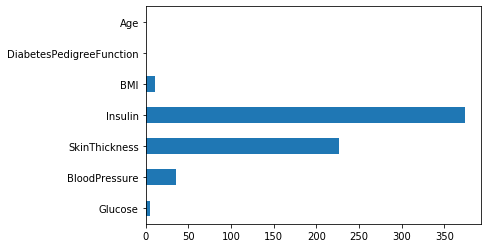

In [12]:
# 결측치의 갯수를 구해 막대 그래프로 시각화 합니다.
df_null.sum().plot.barh()

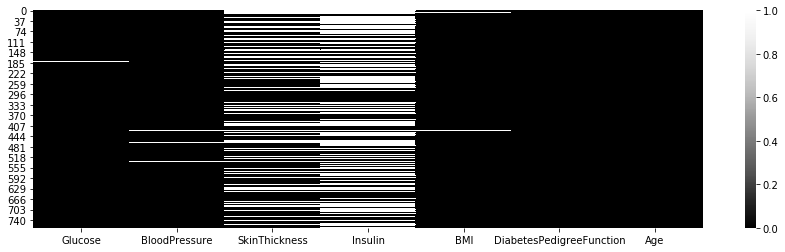

In [13]:
# 결측치를 heatmap 으로 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")

## 정답값
* target, label 이라고 부르기도 합니다.

In [14]:
# 정답값인 Outcome 의 갯수를 봅니다.

df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
# 정답값인 Outcome 의 비율을 봅니다.

df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [16]:
# 다른 변수와 함께 봅니다.
# 임신횟수와 정답값을 비교해 봅니다.
# "Pregnancies"를 groupby 로 그룹화 해서 Outcome 에 대한 비율을 구합니다.
# 결과를 df_po라는 변수에 저장합니다.

df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


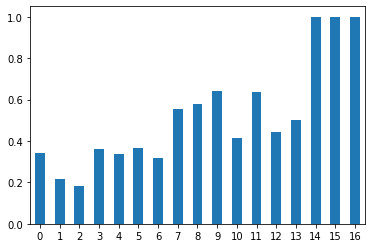

In [17]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po["mean"].plot.bar(rot=0)

## countplot

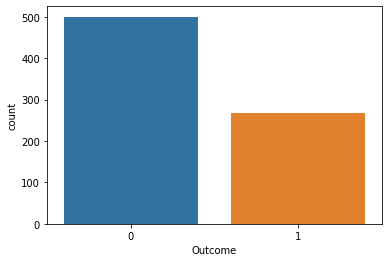

In [18]:
# 위에서 구했던 당뇨병 발병 비율을 구해봅니다.
# 당뇨병 발병 빈도수를 비교 합니다.

sns.countplot(data=df, x="Outcome")

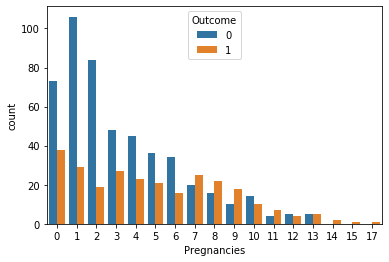

In [19]:
# 임신횟수에 따른 당뇨병 발병 빈도수를 비교합니다.

sns.countplot(data=df, x="Pregnancies", hue="Outcome")

In [20]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만듭니다.

df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


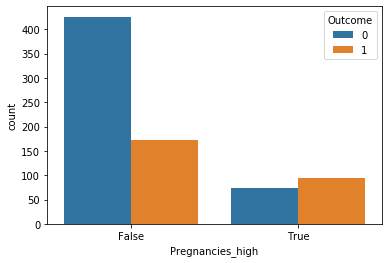

In [21]:
# Pregnancies_high 변수의 빈도수를 countplot 으로 그리고 
# Outcome 값에 따라 다른 색상으로 표현합니다.

sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

## barplot
* 기본 설정으로 시각화 하면 y축에는 평균을 추정해서 그리게 됩니다.

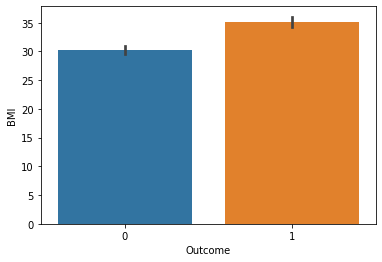

In [22]:
# 당뇨병 발병에 따른 BMI 수치를 비교합니다.

sns.barplot(data=df, x="Outcome", y="BMI")

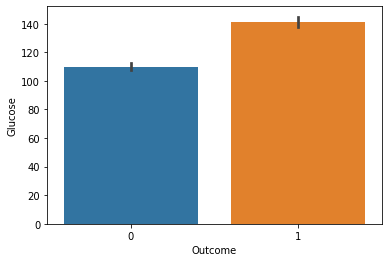

In [23]:
# 당뇨병 발병에 따른 포도당(Glucose)수치를 비교합니다.

sns.barplot(data=df, x="Outcome", y="Glucose")

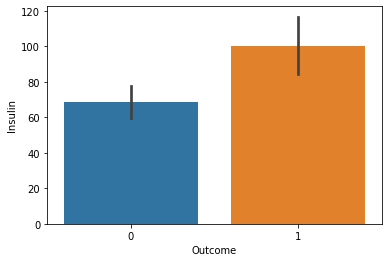

In [24]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병을 비교합니다.

sns.barplot(data=df, x="Outcome", y="Insulin")

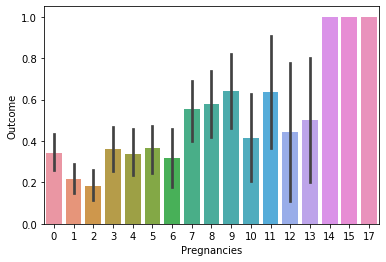

In [25]:
# 임신횟수에 대해서 당뇨병 발병 비율을 비교합니다.

sns.barplot(data=df, x="Pregnancies", y="Outcome")

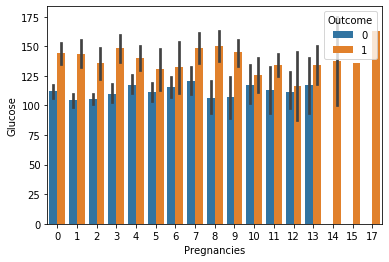

In [26]:
# 임신횟수(Pregnancies)에 따른 포도당(Glucose)수치를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.

sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

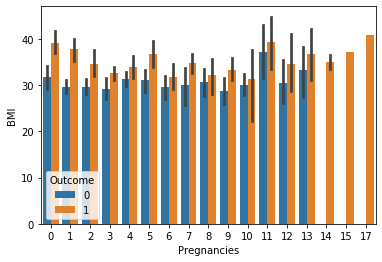

In [27]:
# 임신횟수(Pregnancies)에 따른 체질량지수(BMI)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.

sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

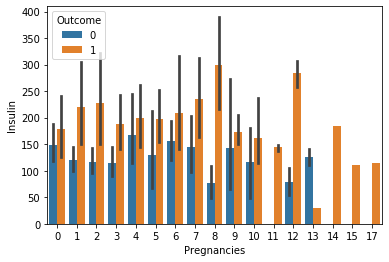

In [28]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다.

sns.barplot(data=df[df["Insulin"] > 0], 
            x="Pregnancies", y="Insulin", hue="Outcome")

## boxplot

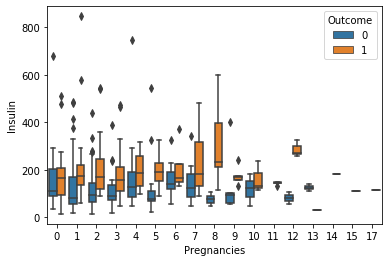

In [29]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다.

sns.boxplot(data=df[df["Insulin"] > 0], 
            x="Pregnancies", y="Insulin", hue="Outcome")

## violinplot

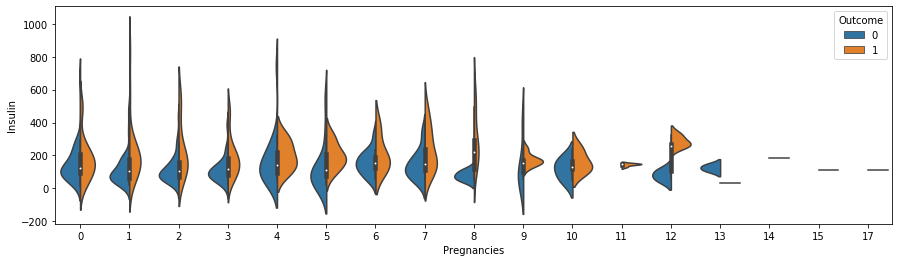

In [30]:
# 위의 그래프를 violinplot 으로 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0], 
            x="Pregnancies", y="Insulin", hue="Outcome", split=True)

## swarmplot

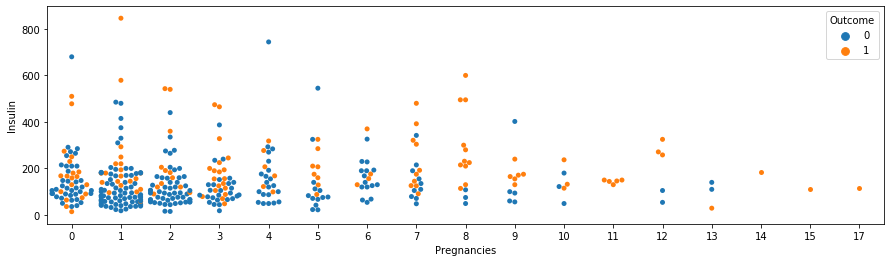

In [31]:
# 위의 그래프를 swarmplot 으로 시각화 합니다.

plt.figure(figsize=(15, 4))
sns.swarmplot(data=df[df["Insulin"] > 0], 
            x="Pregnancies", y="Insulin", hue="Outcome")

## distplot

In [32]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

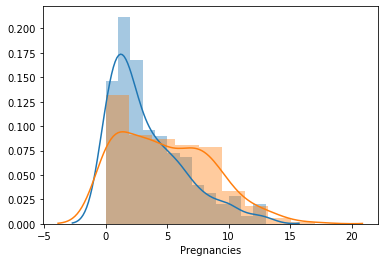

In [33]:
# 임신횟수에 따른 당뇨병 발병 여부를 시각화 합니다.

sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

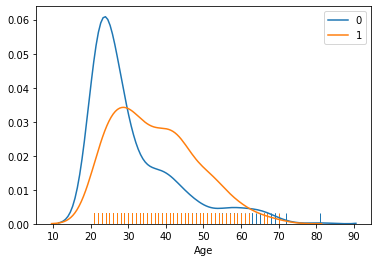

In [34]:
# 나이에 따른 당뇨병 발병 여부를 시각화 합니다.

sns.distplot(df_0["Age"], hist=False, rug=True, label=0)
sns.distplot(df_1["Age"], hist=False, rug=True, label=1)

## Subplots

### Pandas 를 통한 histplot 그리기
* pandas를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려줍니다.

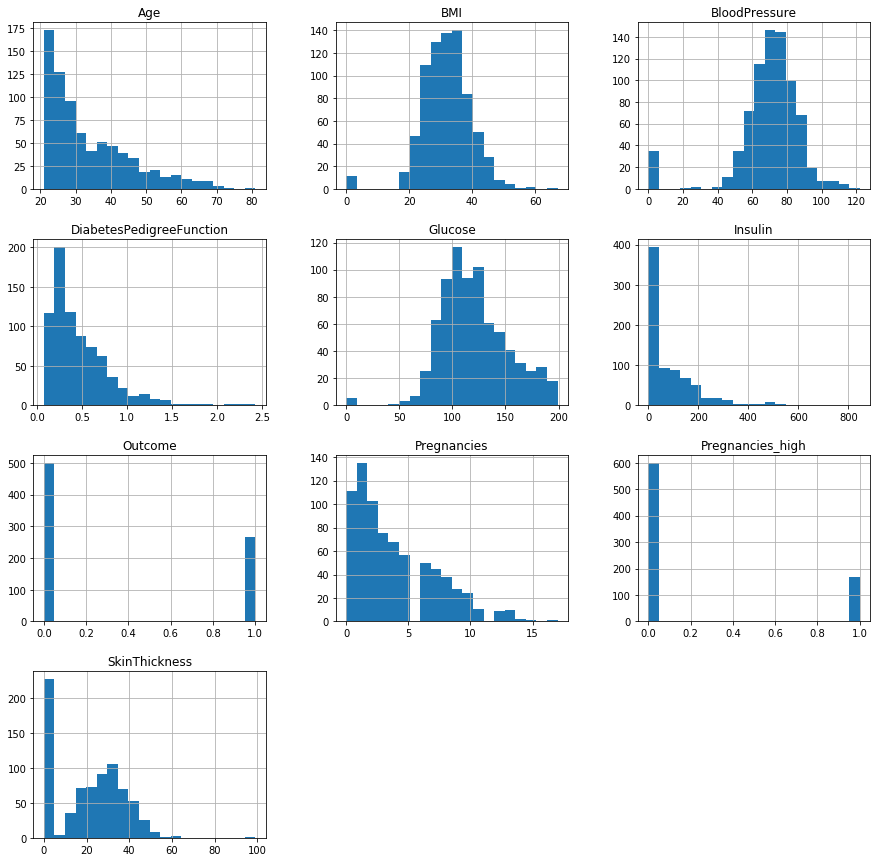

In [35]:
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15, 15), bins=20)

### 반복문을 통한 서브플롯 그리기
#### distplot

In [36]:
# 컬럼의 수 만큼 for 문을 만들어서 서브플롯으로 시각화를 합니다.
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

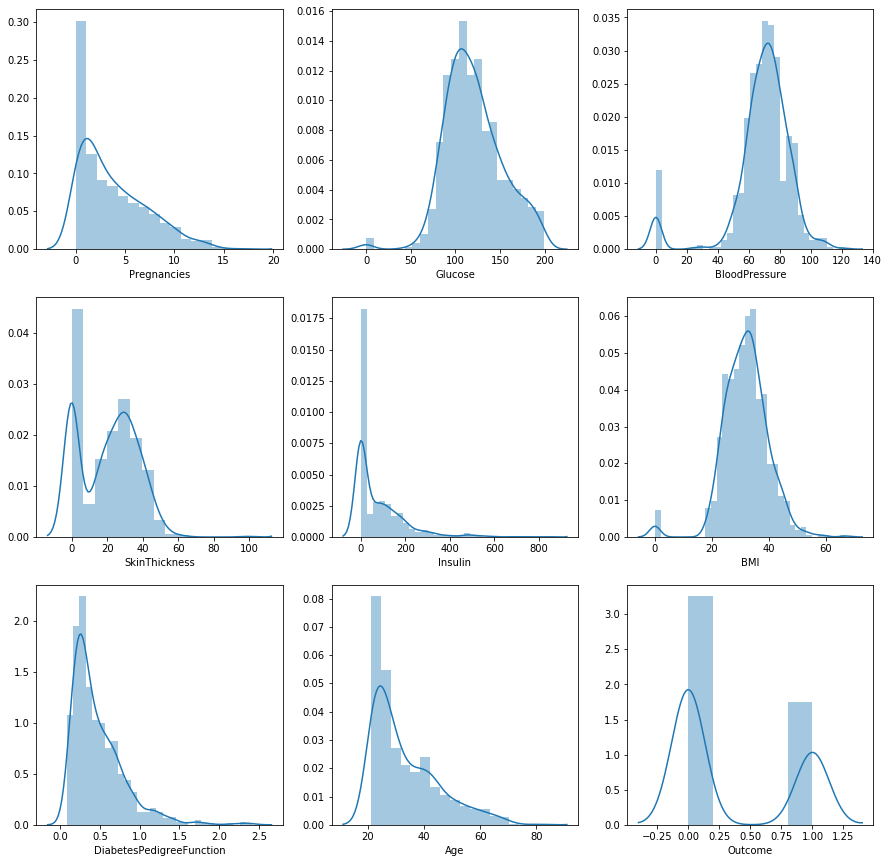

In [37]:
# distplot 으로 서브플롯을 그립니다.

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.distplot(df[col_name], ax=axes[row][col])

In [38]:
df_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
1,1,85,66,29,0,26.6,0.351,31,0,False
3,1,89,66,23,94,28.1,0.167,21,0,False
5,5,116,74,0,0,25.6,0.201,30,0,False
7,10,115,0,0,0,35.3,0.134,29,0,True
10,4,110,92,0,0,37.6,0.191,30,0,False
...,...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0,True
763,10,101,76,48,180,32.9,0.171,63,0,True
764,2,122,70,27,0,36.8,0.340,27,0,False
765,5,121,72,23,112,26.2,0.245,30,0,False


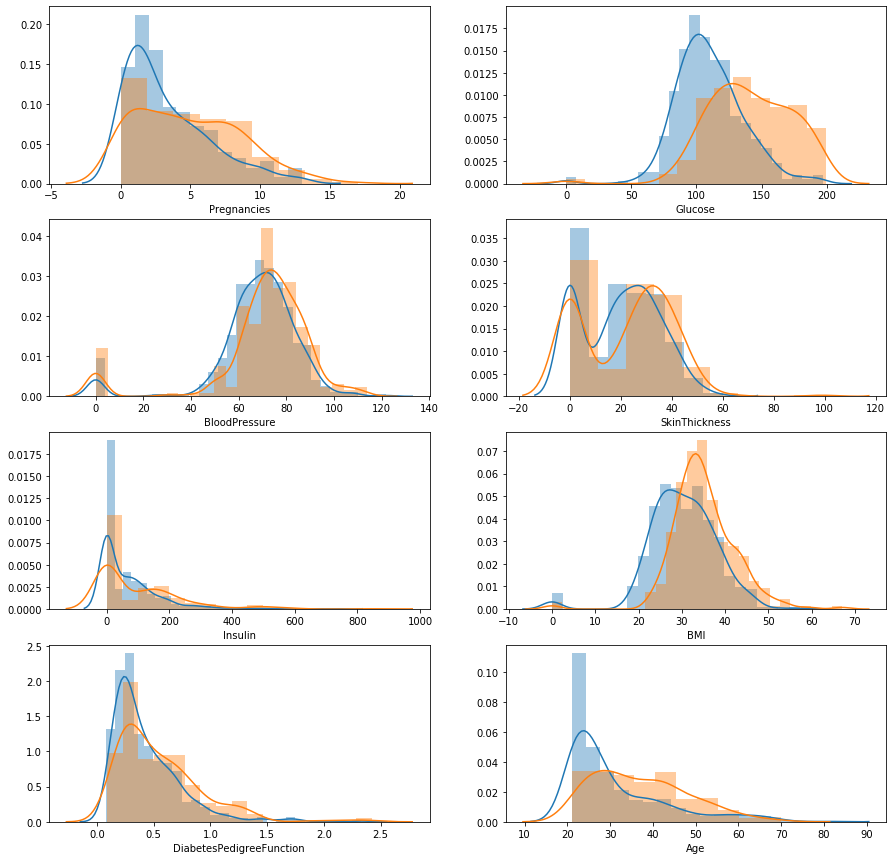

In [39]:
# 모든 변수에 대한 distplot을 그려 봅니다.

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

#### violinplot

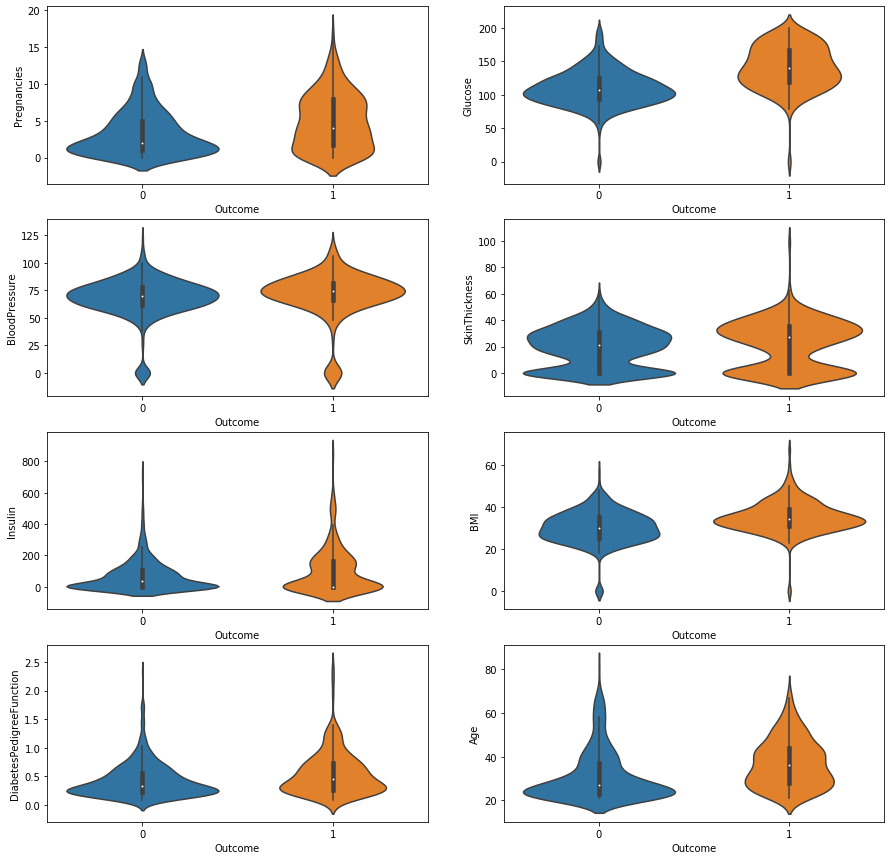

In [40]:
# violinplot 으로 서브플롯을 그려봅니다.


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col])

#### lmplot

* 상관계수가 높은 두 변수에 대해 시각화 합니다.

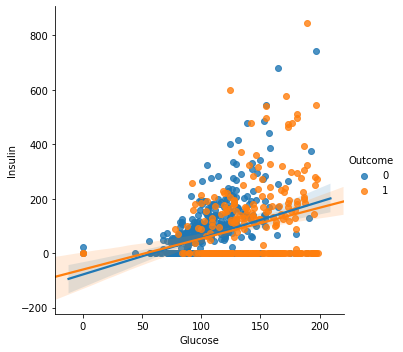

In [41]:
# Glucose 와 Insulin 을 Outcome 으로 구분해 봅니다.

sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

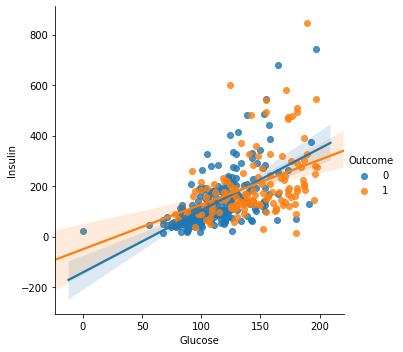

In [42]:
# Insulin 수치가 0 이상인 데이터로만 그려봅니다.

sns.lmplot(data=df[df["Insulin"] > 0], x="Glucose", y="Insulin", hue="Outcome")

#### pairplot

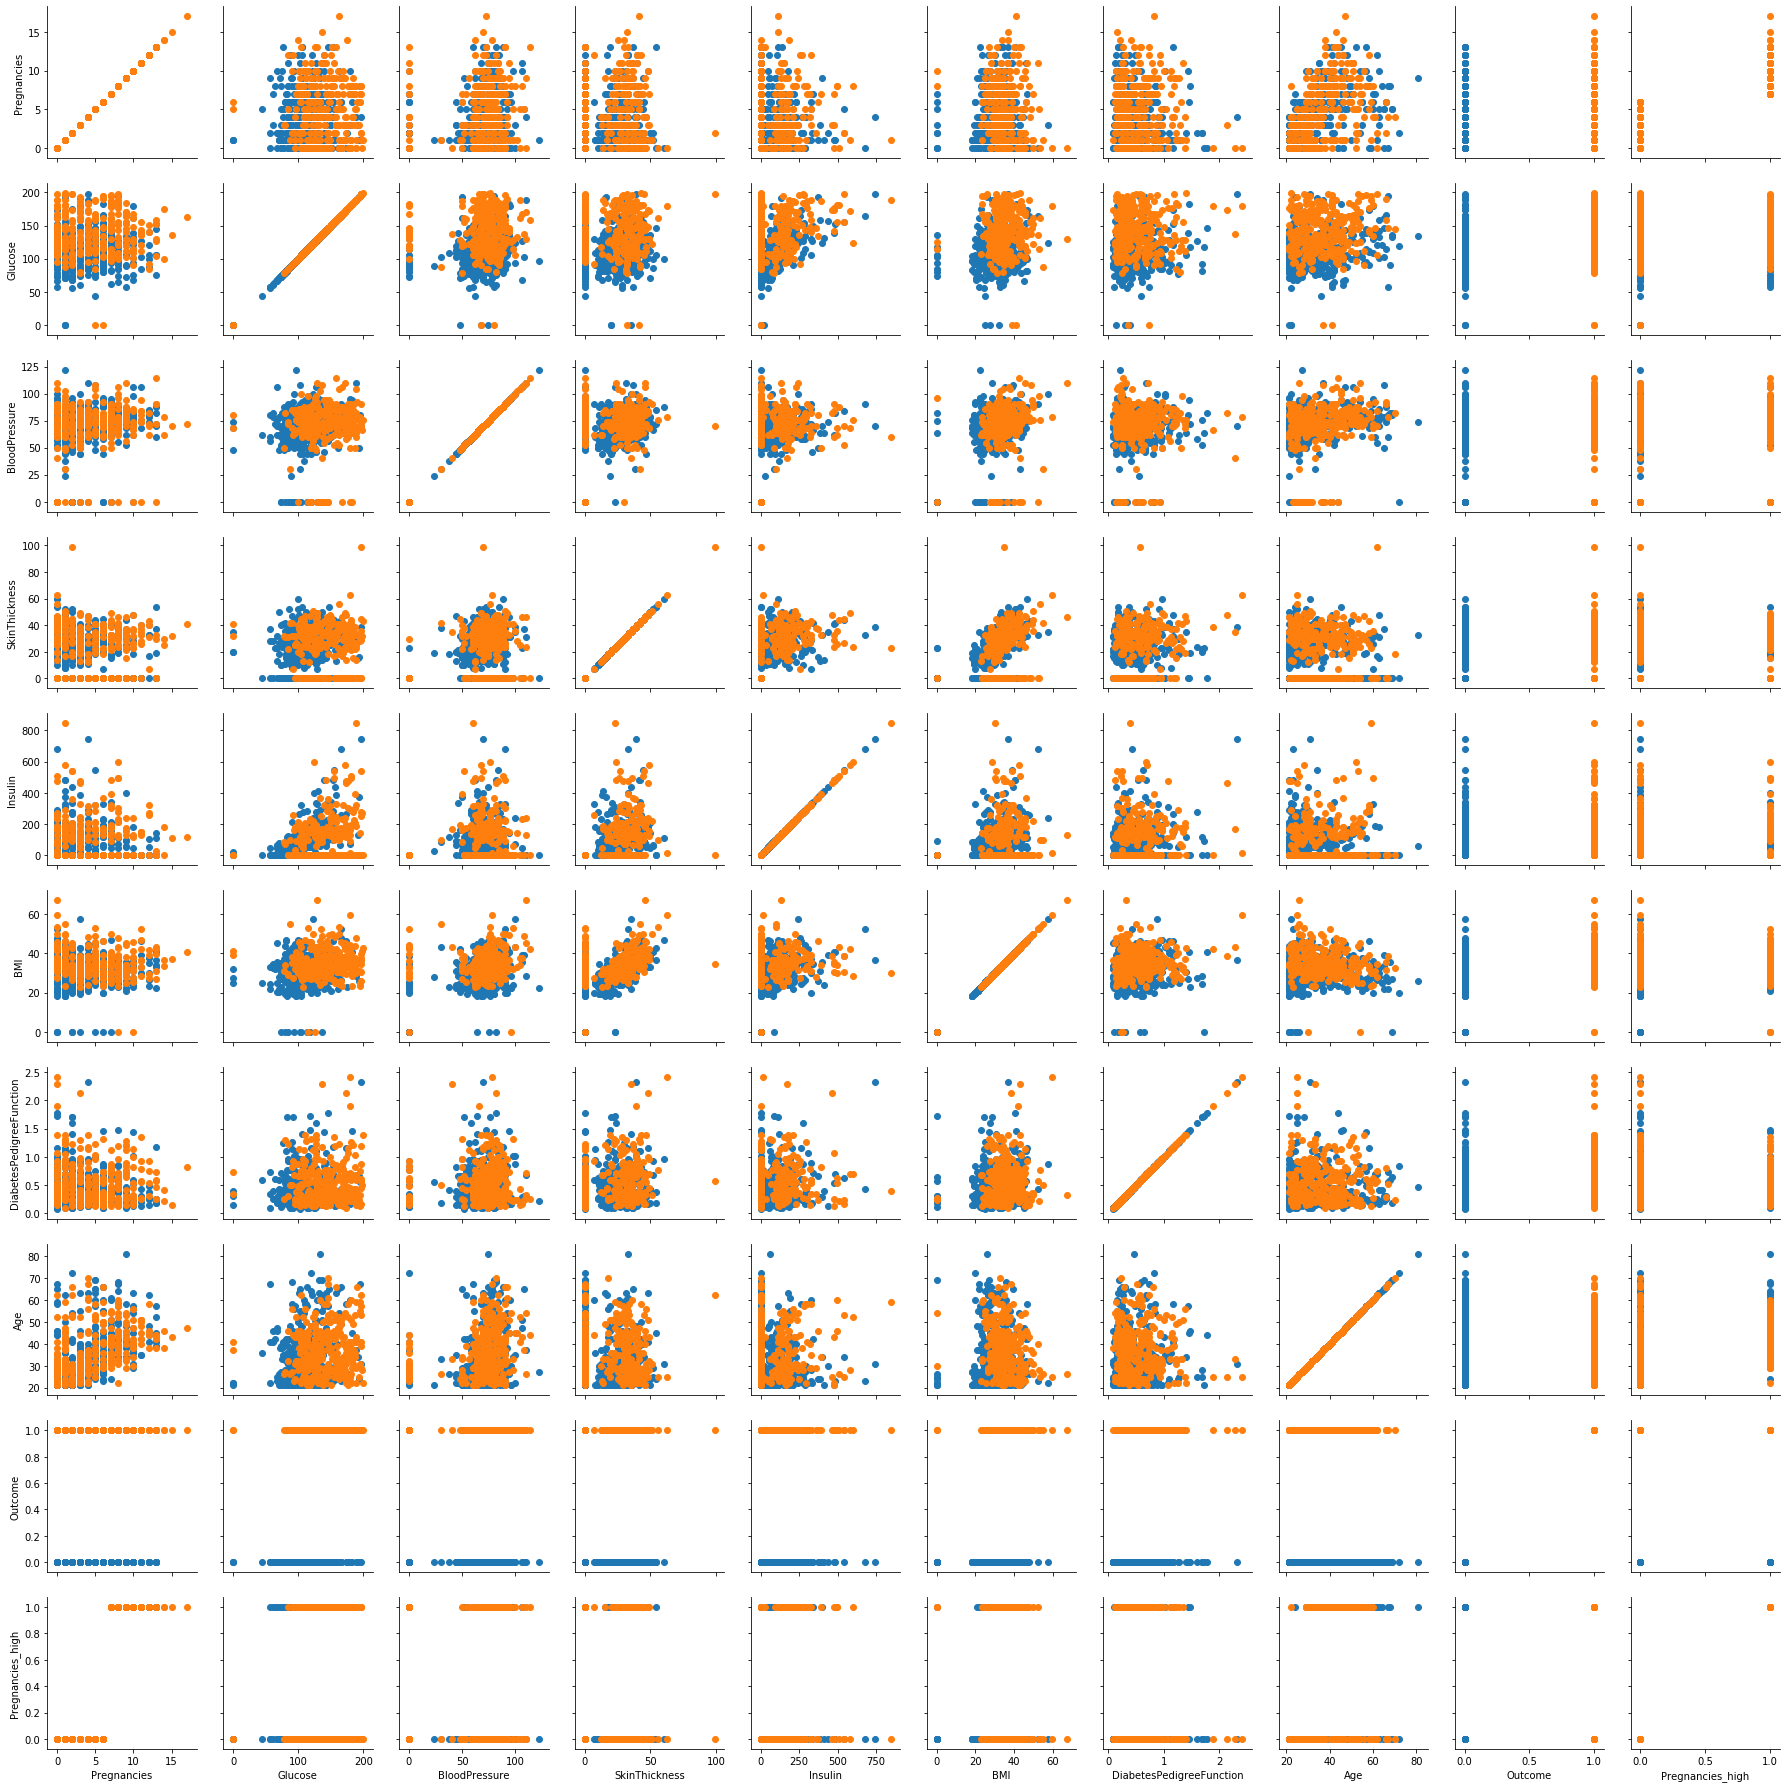

In [43]:
# PairGrid 를 통해 모든 변수에 대해 Outcome 에 따른 scatterplot을 그려봅니다.

g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

## 상관 분석
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)


```
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

In [44]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [45]:
# 정답 값인 Outcome을 제외 하고 feature 로 사용할 컬럼들에 대해 0을 결측치로 만들어 줍니다.
# 상관계수를 구합니다.

df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.166329,0.285013,0.167298,0.104081,0.128207,-0.00645897,0.550525,0.268218
Glucose,0.166329,1,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.49465
BloodPressure,0.285013,0.223192,1,0.226839,0.0982723,0.28923,-0.00280453,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.0982723,0.184888,1,0.22805,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.28923,0.648214,0.22805,1,0.155382,0.0258415,0.31368
DiabetesPedigreeFunction,-0.00645897,0.137246,-0.00280453,0.115016,0.130395,0.155382,1,0.0335613,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.0258415,0.0335613,1,0.238356
Outcome,0.268218,0.49465,0.170589,0.259491,0.303454,0.31368,0.173844,0.238356,1


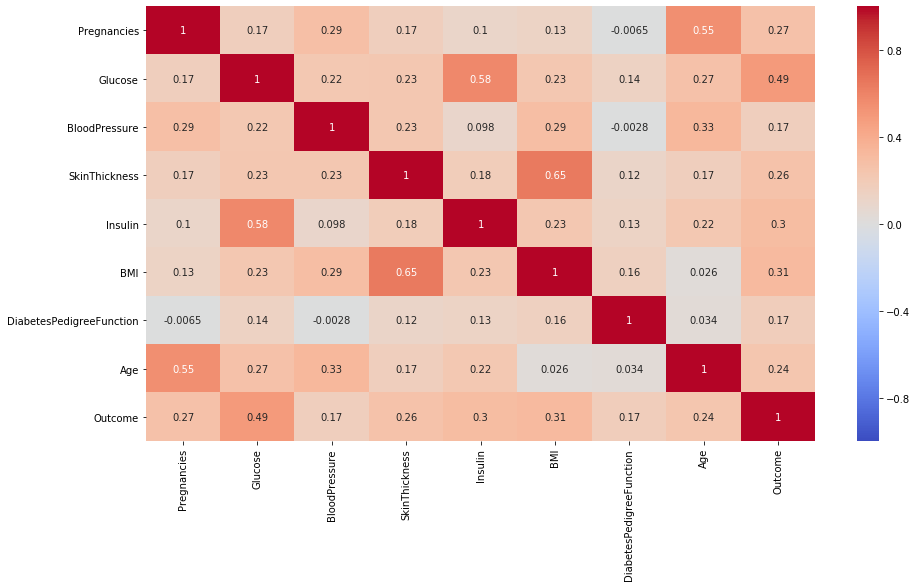

In [46]:
# 위에서 구한 상관계수를 heatmap으로 시각화 합니다.
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [47]:
#  Outcome 수치에 대한 상관계수만 모아서 봅니다.

df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

### 상관계수가 높은 변수끼리 보기

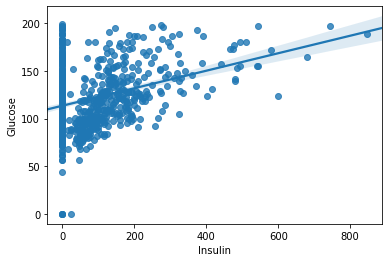

In [48]:
# Insulin 과 Glucose 로 regplot 그리기
sns.regplot(data=df, x="Insulin", y="Glucose")

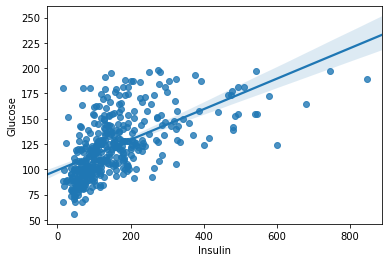

In [49]:
# df_0 으로 결측치 처리한 데이터프레임으로
# Insulin 과 Glucose 로 regplot 그리기

sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

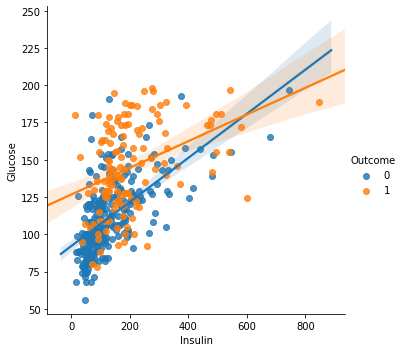

In [50]:
sns.lmplot(data=df_matrix, x="Insulin", y="Glucose", hue="Outcome")

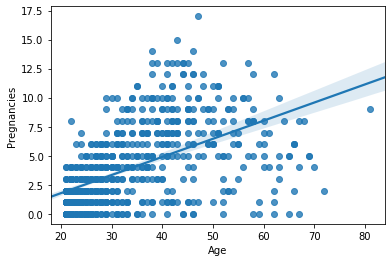

In [51]:
# Age 와 Pregnancies 로 regplot 그리기

sns.regplot(data=df, x="Age", y="Pregnancies")

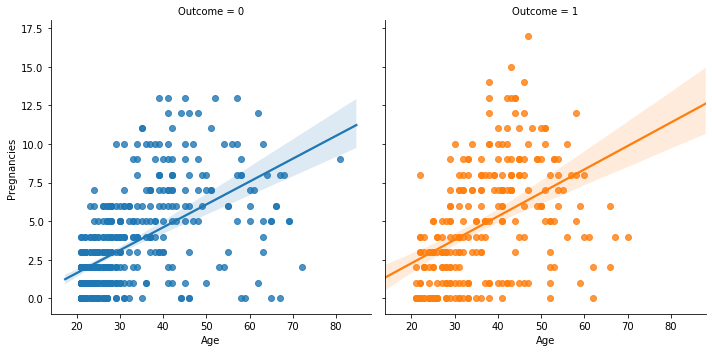

In [52]:
# Age 와 Pregnancies 로 lmplot 을 그리고 Outcome 에 따라 다른 색상으로 표현하기

sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")